### Task : Classification (Stochastic Gradient Descent Classifier -> Multiclass)
#### Input Features (Predictor Variables) : Pixel Values (28 x 28)
#### Output (Response Variable(s)) : Digit (0 - 9)

### Importing the necessary modules

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics, datasets, base
from joblib import dump, load

### Collecting, Analyzing and Visualizing the Data

In [51]:
path = os.path.join("Datasets", "mnist_digits_mini.csv")

df = pd.read_csv(path)
df.head()

,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df['label'].value_counts()

2    124
0    107
7    105
4    102
9     97
6     97
1     96
8     93
3     90
5     89
Name: label, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 6.0 MB


In [19]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,4.401000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.888692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


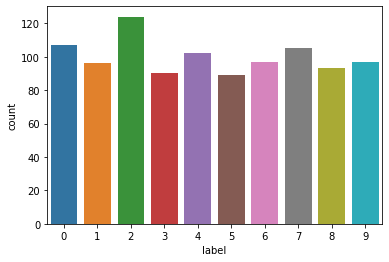

In [22]:
# Count Plot

sns.countplot(x = 'label', data = df)
plt.show()

1


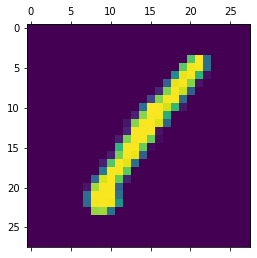

0


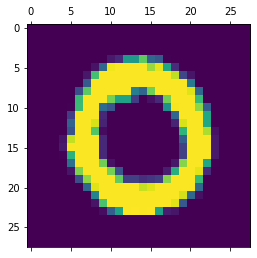

1


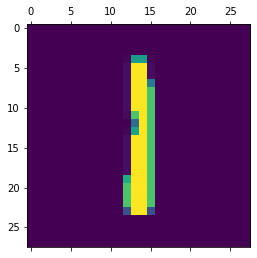

4


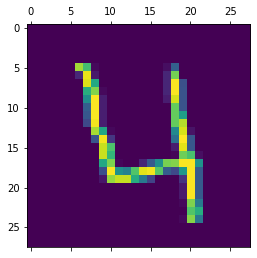

0


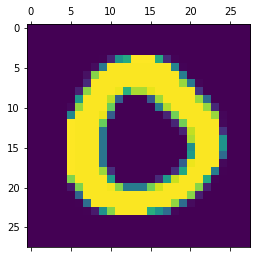

0


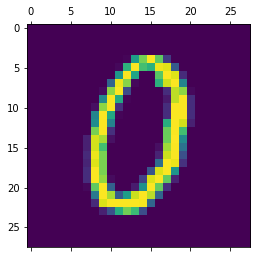

7


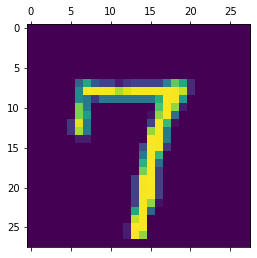

3


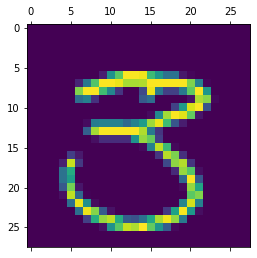

5


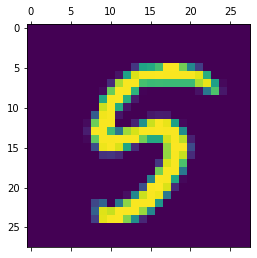

3


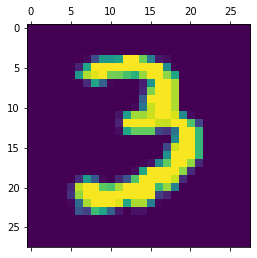

In [38]:
# Visualizing the handwritten digits using matplotlib

for i in range(10):
    print(df['label'][i])
    img = np.array(df.drop('label', axis = 1).iloc[i]).reshape(28, 28)
    plt.matshow(img)
    plt.show()

### Data Preprocessing and Preparation

In [43]:
X = df.drop('label', axis = 1).values
y = df['label'].values

In [47]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_idx, test_idx in strat_split.split(X, y):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

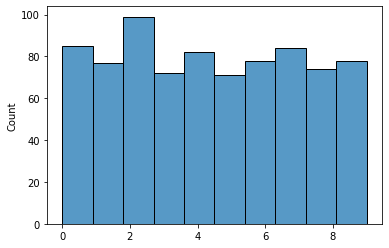

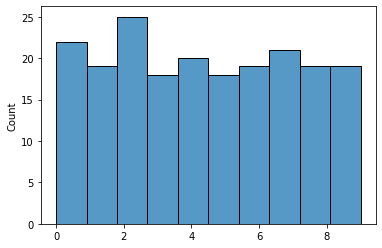

In [55]:
# Checking whether the samples are distributed uniformely

sns.histplot(y_train, bins = 10)
plt.show()

sns.histplot(y_test, bins = 10)
plt.show()

### Training the Model and Evaluating it's Performance

In [84]:
# Implementing Stochastic Gradient Descent Classifier from scratch

class SGDClassifier:
    
    def __init__(self, t0 = 5, t1 = 50, n_epochs = 500):
        self.n_epochs = n_epochs
        self.t0, self.t1 = t0, t1
        self.w = self.b = None
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_epochs):
            for i in range(n):
                rand_idx = np.random.randint(n)
                X_ = X[rand_idx: rand_idx + 1]
                y_ = y[rand_idx: rand_idx + 1]
                y_pred = self.sigmoid(np.dot(X_, self.w) + self.b)
                dw = np.dot(X_.T, y_pred - y_)
                db = np.sum(y_pred - y_)
                lr = self.learning_schedule(n * self.n_epochs + i)
                self.w -= lr * dw
                self.b -= lr * db
                
    def predict(self, X):
        y_pred = (self.sigmoid(np.dot(X, self.w) + self.b) >= 0.5).astype(int)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
    
    def learning_schedule(self, t):
        return self.t0 / (t + self.t1)
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [85]:
# Number of classifiers need to be trained

n_clf = len(np.unique(y))

In [86]:
# Preparing training sets for each of the unique label

y_train_sets = []

for i in range(n_clf):
    y_train_i = (y_train == i).astype(int)
    y_train_sets.append(y_train_i)

In [118]:
# Training 'n_clf' Binary Classifiers

clfs = []

for i in range(n_clf):
    clf = SGDClassifier(n_epochs = 500)
    clfs.append(clf)
    clfs[i].fit(X_train, y_train_sets[i])

In [119]:
y_train_pred_all = []
y_train_scores = []

for i in range(n_clf):
    y_train_pred = clfs[i].predict(X_train)
    y_train_pred_all.append(y_train_pred)
    y_train_scores.append(clfs[i].score(X_train, y_train_sets[i]))

In [120]:
y_train_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [121]:
# Stacking individual classifier predictions

y_train_pred_stacked = np.stack(y_train_pred_all, axis = 1)

In [122]:
y_train_pred_final = []

for pred in y_train_pred_stacked:
    if not any(pred):
        y_train_pred_final.append(np.argmin(y_train_scores))
    else:
        y_train_pred = np.argmax(pred + y_train_scores)
        y_train_pred_final.append(y_train_pred)

In [123]:
train_acc = np.sum(y_train == y_train_pred_final) / len(y_train)

print("Train Accuracy :", train_acc)

Train Accuracy : 1.0


#### Sklearn Implementation

In [124]:
# Implementing Logistic Regression through Sklearn

model = linear_model.SGDClassifier()

model.fit(X_train, y_train)

SGDClassifier()

In [125]:
y_train_pred = model.predict(X_train)

print("Train Accuracy :", model.score(X_train, y_train))

Train Accuracy : 0.98875


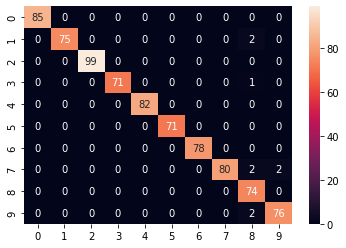

In [126]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [127]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1 = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9895061728395063
Recall or Sensitivity : 0.98875
F1 Score : 0.9888657870376134


In [128]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      0.97      0.99        77
           2       1.00      1.00      1.00        99
           3       1.00      0.99      0.99        72
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        78
           7       1.00      0.95      0.98        84
           8       0.91      1.00      0.95        74
           9       0.97      0.97      0.97        78

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



### Validating the model 

In [129]:
y_test_sets = []

for i in range(n_clf):
    y_test_sets.append((y_test == i).astype(int))

In [130]:
y_test_pred_all = []
y_test_scores = []

for i in range(n_clf):
    y_test_pred = clfs[i].predict(X_test)
    y_test_pred_all.append(y_test_pred)
    y_test_scores.append(clfs[i].score(X_test, y_test_sets[i]))

In [131]:
y_test_scores

[0.99, 0.98, 0.98, 0.97, 0.96, 0.965, 0.99, 0.96, 0.86, 0.915]

In [132]:
# Stacking individual classifier predictions

y_test_pred_stacked = np.stack(y_test_pred_all, axis = 1)

In [133]:
y_test_pred_final = []

for pred in y_test_pred_stacked:
    if not any(pred):
        y_test_pred_final.append(np.argmin(y_test_scores))
    else:
        y_test_pred = np.argmax(pred + y_test_scores)
        y_test_pred_final.append(y_test_pred)

In [134]:
test_acc = np.sum(y_test == y_test_pred_final) / len(y_test)

print("Test Accuracy :", test_acc)

Test Accuracy : 0.805


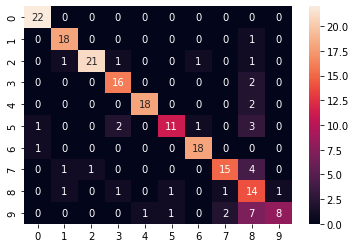

In [135]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred_final)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [136]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred_final, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_final, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_final, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.8410328663424638
Recall or Sensitivity : 0.805
F1 Score : 0.8073235846902965


In [137]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred_final)

print(clf_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.86      0.95      0.90        19
           2       0.95      0.84      0.89        25
           3       0.80      0.89      0.84        18
           4       0.95      0.90      0.92        20
           5       0.85      0.61      0.71        18
           6       0.90      0.95      0.92        19
           7       0.83      0.71      0.77        21
           8       0.41      0.74      0.53        19
           9       0.89      0.42      0.57        19

    accuracy                           0.81       200
   macro avg       0.84      0.80      0.80       200
weighted avg       0.84      0.81      0.81       200



####  Cross Validation

In [139]:
scores = model_selection.cross_val_score(linear_model.SGDClassifier(), X, y, cv = 10)

print(scores)
print("Cross Validation Score (Average) :", np.sum(scores) / len(scores))

[0.75 0.82 0.8  0.83 0.81 0.82 0.86 0.84 0.84 0.89]
Cross Validation Score (Average) : 0.826
